In [1]:
# Python libraries
import os
import sys
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
sys.path.append("myfun/")
from ipynb.fs.full.myfun_model_usefulfuns import *

2023-09-20 15:34:02.160619: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


In [2]:
# save the figure
flag_save = False

In [3]:
target_dir = "./out/"
for name in sorted(os.listdir(target_dir)):
    print(name)

2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2
2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4
2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10
2023-09-12_17-01-56_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn-all
2023-09-12_20-58-20_df1-2-3-4-5-6-7-8-9-10-PRE-linlog
2023-09-12_22-17-04_all


## Loading info

In [4]:
# NN
dir_nn2 = "2023-09-12_00-24-13_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn2"
dir_nn4 = "2023-09-12_03-46-07_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn4"
dir_nn10 = "2023-09-12_12-12-01_df1-2-3-4-5-6-7-8-9-10_500it-PRE-nn10"

## LIN LOG
dir_linlog = "2023-09-12_20-58-20_df1-2-3-4-5-6-7-8-9-10-PRE-linlog"

### NN2

In [5]:
path = target_dir + dir_nn2
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN2 - Jupyter Notebook.pdf
info_nn2.txt


In [6]:
namefile_nn2 = "/info_nn2.txt"

# Construct a list for header
with open(path + namefile_nn2) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [7]:
info_nn2 = pd.read_csv(path + namefile_nn2, sep=',', usecols= header)

### NN4

In [8]:
path = target_dir + dir_nn4
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN4 - Jupyter Notebook.pdf
info_nn4.txt


In [9]:
namefile_nn4 = "/info_nn4.txt"

# Construct a list for header
with open(path + namefile_nn4) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [10]:
info_nn4 = pd.read_csv(path + namefile_nn4, sep=',', usecols= header)

### NN10

In [11]:
path = target_dir + dir_nn10
for name in sorted(os.listdir(path)):
    print(name)

08a NN model in whole dataset - pre NN10 - Jupyter Notebook.pdf
info_nn10.txt


In [12]:
namefile_nn10 = "/info_nn10.txt"

# Construct a list for header
with open(path + namefile_nn10) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [13]:
info_nn10 = pd.read_csv(path + namefile_nn10, sep=',', usecols= header)

### NN info

In [14]:
# For better handling the plot
info_nn = pd.concat([info_nn2, info_nn4, info_nn10]).reset_index()

### Lin Log info

In [15]:
path = target_dir + dir_linlog
for name in sorted(os.listdir(path)):
    print(name)

info_data.txt
v0_df1-2-3-4-5-6-7-8-9-10_1.svg


In [16]:
namefile = '/info_data.txt'

# get the header
with open(path + namefile) as f:
    header = f.readline().split(sep=',')
header[-1] = header[-1].split("\n")[0]

In [17]:
info_linlog = pd.read_csv(path + namefile, sep=',', usecols= header).reset_index()

## Make str into numpy arrays in dfs

In [18]:
nn_cols = ['t_list', 'x_list', 'v_list', 'v0_scn']

for col in nn_cols:
    info_nn[col] = info_nn[col].apply(lambda x: x.replace('array','np.array')).apply(eval).apply(np.array)

In [19]:
ll_cols = ['t_list', 'x_list']

for col in ll_cols:
    info_linlog[col] = info_linlog[col].apply(lambda x: x.replace('array','np.array')).apply(eval).apply(np.array)

# Density - in a df

In [20]:
info_lin = info_linlog.loc[info_linlog['LWR_flag']=='Lin']
info_lin_n1 = info_lin.loc[info_linlog['N. file']==1]

In [21]:
info_lin_n1

,index,t_list,x_list,v0_scn,L_scn,n_scn,N. file,LWR_flag,processed
0,0,"[2.24, 2.29, 2.34, 2.39, 2.44, 2.49, 2.54, 2.5...","[[6.54115583, 8.08862013, 9.63622603, 11.18397...",32.524004,2.114480,0,1,Lin,pre
1,1,"[16.44, 16.490000000000002, 16.54, 16.59, 16.6...","[[25.56044125, 26.8471916, 28.13404136, 29.420...",27.026377,2.000000,1,1,Lin,pre
2,2,"[33.440000000000005, 33.49, 33.540000000000006...","[[29.01531893, 30.33136515, 31.64823598, 32.96...",30.000000,5.000000,2,1,Lin,pre
3,3,"[37.440000000000005, 37.49, 37.540000000000006...","[[42.18965274, 43.43449131, 44.68247025, 45.93...",29.109448,2.000000,3,1,Lin,pre
4,4,"[44.24, 44.290000000000006, 44.34, 44.39, 44.4...","[[43.43569439, 44.76042962, 46.08598381, 47.41...",29.381092,2.477765,4,1,Lin,pre
...,...,...,...,...,...,...,...,...,...
104,104,"[499.03999999999996, 499.09, 499.14, 499.19, 4...","[[45.16576677, 46.1816823, 47.1968853, 48.2114...",22.095501,2.000000,104,1,Lin,pre
105,105,"[500.64, 500.69, 500.74, 500.78999999999996, 5...","[[36.49947975, 37.08908737, 37.68590005, 38.28...",16.848349,2.000000,105,1,Lin,pre
106,106,"[502.24, 502.29, 502.34000000000003, 502.39, 5...","[[33.19840612, 33.68172485, 34.20049923, 34.74...",18.547528,2.000000,106,1,Lin,pre
107,107,"[534.84, 534.89, 534.94, 534.99, 535.04, 535.0...","[[34.71300812, 34.76474324, 35.0344309, 35.441...",29.940332,5.816074,107,1,Lin,pre


In [22]:
data = info_lin_n1

In [23]:
t = data['t_list']
x = data['x_list']
n = sum([len(trajs) for trajs in x])
ln = 1/n

In [24]:
n

246

## Standardization

In [25]:
## Standardize x - scn by scn
xMeans = [row.mean() for row in x]
xStds = [row.std() for row in x]
xMean = np.mean(xMeans)
xStd = np.std(xStds)
x_std = (x - xMean)/xStd

In [26]:
xMean, xStd

(59.18387328925651, 6.283765894669738)

In [27]:
x, x_std

(0      [[6.54115583, 8.08862013, 9.63622603, 11.18397...
 1      [[25.56044125, 26.8471916, 28.13404136, 29.420...
 2      [[29.01531893, 30.33136515, 31.64823598, 32.96...
 3      [[42.18965274, 43.43449131, 44.68247025, 45.93...
 4      [[43.43569439, 44.76042962, 46.08598381, 47.41...
                              ...                        
 104    [[45.16576677, 46.1816823, 47.1968853, 48.2114...
 105    [[36.49947975, 37.08908737, 37.68590005, 38.28...
 106    [[33.19840612, 33.68172485, 34.20049923, 34.74...
 107    [[34.71300812, 34.76474324, 35.0344309, 35.441...
 108    [[42.76867897, 43.34798901, 43.92755851, 44.50...
 Name: x_list, Length: 109, dtype: object,
 0      [[-8.37757458531534, -8.13131074832029, -7.885...
 1      [[-5.350840977029061, -5.146067220086349, -4.9...
 2      [[-4.801030920780684, -4.591595012113821, -4.3...
 3      [[-2.7044643027952415, -2.5063603964966403, -2...
 4      [[-2.5061689380591097, -2.2953502582728826, -2...
                             

In [28]:
## Traslating time
t_std = [row - row[0] for row in t]

In [29]:
tmp = [len(tt) for tt in t_std]
imax = tmp.index(np.max(tmp))
t_std_all = t_std[imax]

In [30]:
t_std_all

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
       1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
       2.2 ])

### Density

In [31]:
x_std

0      [[-8.37757458531534, -8.13131074832029, -7.885...
1      [[-5.350840977029061, -5.146067220086349, -4.9...
2      [[-4.801030920780684, -4.591595012113821, -4.3...
3      [[-2.7044643027952415, -2.5063603964966403, -2...
4      [[-2.5061689380591097, -2.2953502582728826, -2...
                             ...                        
104    [[-2.230844807752545, -2.0691717685227164, -1....
105    [[-3.6099997866723132, -3.516169489700215, -3....
106    [[-4.135333429798669, -4.05841797207769, -3.97...
107    [[-3.894299307046774, -3.8860661677371304, -3....
108    [[-2.6123179307460904, -2.5201263931059947, -2...
Name: x_list, Length: 109, dtype: object

In [32]:
density = []
# run over scenes
for iscn in range(len(x_std)):
    pos_scn, density_scn = [], []
    x_scn = x_std[iscn]
    for idx in range(len(t_std[iscn])):
        pos = x_scn[:,idx]
        den = np.diff(pos, axis = 0)
        pos_scn.append(pos)
        density_scn.append((ln/den))

    density.append([np.stack(pos_scn,axis=0), np.stack(density_scn,axis=0)])

### Plot

In [38]:
index = 95

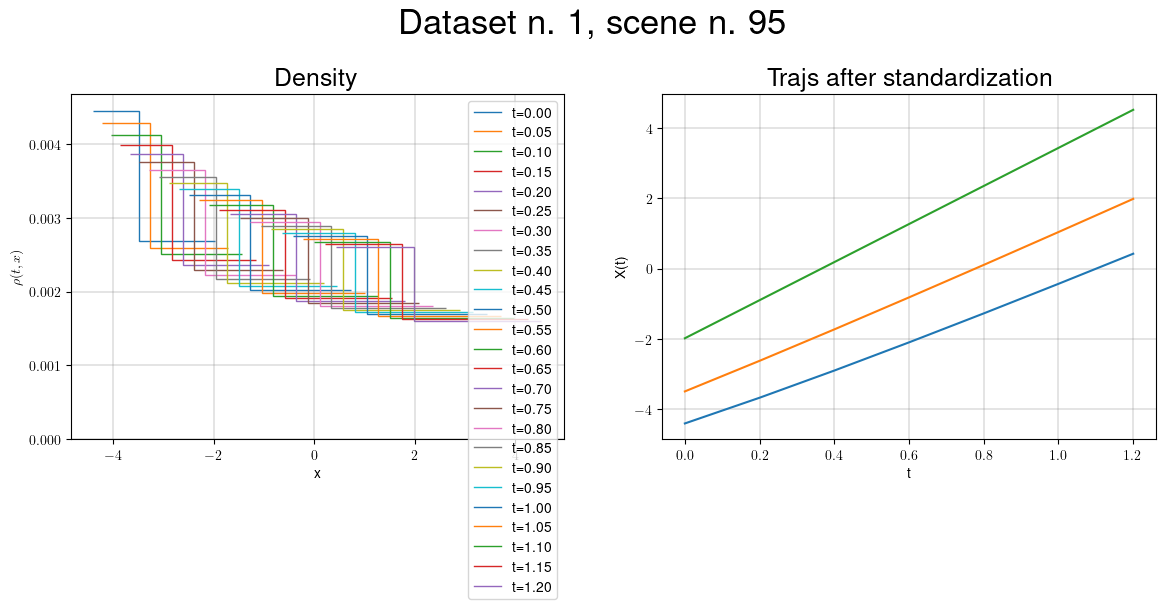

In [103]:
# Initialize the figure
width, height = 7, 5
nfig = 2
fig = plt.figure(figsize = (width*nfig,height))

fmt = '{:.2f}'

xx, tt = x_std[index], t_std[index]
N = len(xx)
pos, d = density[index]

# 1. Density
ax1 = fig.add_subplot(1, nfig, 1)
for i in range(len(tt)):
    ax1.stairs(d[i], pos[i], baseline=None, label=f't={fmt.format(tt[i])}')
    ax1.grid(color='grey', linestyle='-', linewidth=0.3);

ax1.legend()
ax1.set_xlabel("x")
ax1.set_ylabel(rf"$\rho(t,x)$")
ax1.set_title('Density',fontsize=18);


# 2. Trajs after standardization
ax2 = fig.add_subplot(1, nfig, 2);
tt_matched, xx_matched = match_timestamps_scene(tt, xx)
for veh in range(0,N):
    # X.T (transposed) is the list of trajectories of the vehicles
    ax2.plot(tt_matched, xx_matched[veh])
ax2.set_xlabel("t")
ax2.set_ylabel("X(t)")
ax2.set_title('Trajs after standardization',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.3);



nf, ns = data['N. file'][index], data['n_scn'][index]

fig.suptitle(f'Dataset n. {nf}, scene n. {ns}',fontsize=25, y=0.97);
fig.subplots_adjust(top=0.8)
plt.show();

In [35]:
# [sum(i) for i in map(sum,zip(*density))]

### Collecting all the scenes in one

In [113]:
trajs = [scn.tolist() for scn in x_std]
time = [scn.tolist() for scn in t_std]

In [114]:
len(trajs), len(time)

(109, 109)

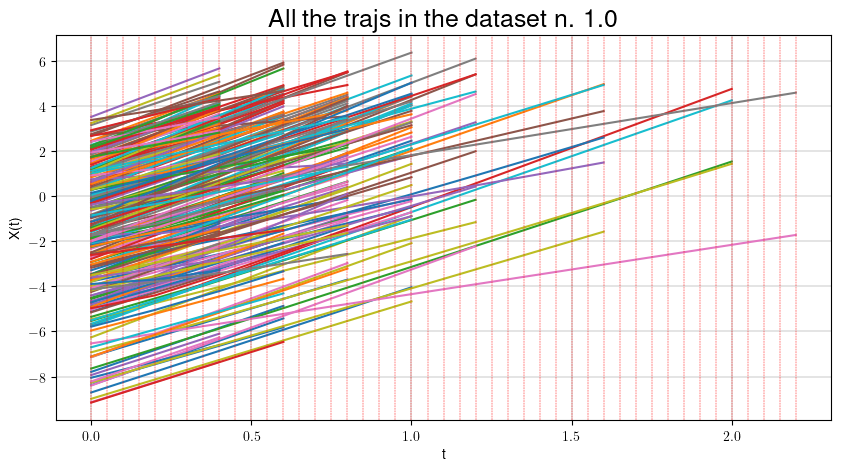

In [116]:
# Create fig
width, height = 10, 5
fig, ax = plt.subplots(figsize=(width,height))

fmt = '{:.2f}'

for i in range(len(time)):
    
    xx, tt = trajs[i], time[i]
    N = len(xx)
    
    tt_matched, xx_matched = match_timestamps_scene(tt, xx)
    for veh in range(0,N):
        # X.T (transposed) is the list of trajectories of the vehicles
        ax.plot(tt_matched, xx_matched[veh])

        
tmp = [len(tt) for tt in time]
imax = tmp.index(np.max(tmp))
for ts in time[imax]:
    ax.axvline(x = ts, color = 'red', linestyle = '--', linewidth=0.35)
    
ax.set_xlabel("t")
ax.set_ylabel(f"X(t)")
ax.grid(color='grey', linestyle='-', linewidth=0.3);

nf = data['N. file'].mean()
plt.title(f'All the trajs in the dataset n. {nf}',fontsize=18);
plt.show();

In [117]:
time2 = [scn.tolist() for scn in t]

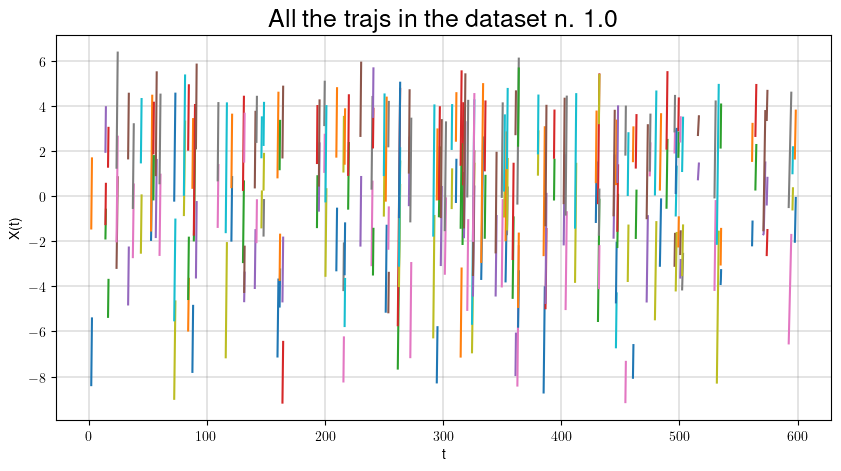

In [118]:
# Create fig
width, height = 10, 5
fig, ax = plt.subplots(figsize=(width,height))

fmt = '{:.2f}'

for i in range(len(time)):
    
    xx, tt = trajs[i], time2[i]
    N = len(xx)
    
    tt_matched, xx_matched = match_timestamps_scene(tt, xx)
    for veh in range(0,N):
        # X.T (transposed) is the list of trajectories of the vehicles
        ax.plot(tt_matched, xx_matched[veh])
    
ax.set_xlabel("t")
ax.set_ylabel(f"X(t)")
ax.grid(color='grey', linestyle='-', linewidth=0.3);

nf = data['N. file'].mean()
plt.title(f'All the trajs in the dataset n. {nf}',fontsize=18);
plt.show();

> Non posso creare una scena equivalente

In [ ]:
# trajs_together = [traj.tolist() for scn in x_std for traj in scn] #together